# NOTE ON JUPYTER NOTEBOOKS
    
For reasons that are detailed in the root README.md, I'm using Cauldron notebooks in this project to display meaningful results - any Jupyter notebooks are just exploratory chicken scratches.

If you want to see meaningful outputs, you have three easy options:
- Option 1: check within this directory for a folder called 'html' - within that directory will be an html file where you can see all the visuals.
- Option 2: go to http://unnotebook.com/reader-install/ and install the reader, and point it to the EDA.cauldron file in this directory. The install is actually fast and easy, and the visuals look the best in this format.
- Option 3: check this directory for a pdf that I've printed from the Cauldron notebook. This is just visuals without code, and the visuals aren't as good as the other two options.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from tqdm import tqdm

%matplotlib inline
#%matplotlib notebook

In [2]:
df = pd.read_csv('../../data/processed/wrangled_dataframe.csv', header=0, low_memory=False)

In [3]:
dfex = df[:100]
dfex.head()

,store,state,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
0,1,HE,2013-01-01,8,6,3,6,3,1,93,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
1,56,HE,2013-01-01,8,6,3,6,3,1,93,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2,69,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
3,77,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
4,111,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


In [4]:
d2ex = df.copy()
d2ex['date'] = pd.to_datetime(d2ex.date)
d2ex['week_start'] = pd.to_datetime(d2ex.week_start)
d2ex.set_index(['date', 'store'], inplace=True)
d2ex = d2ex[:100]
d2ex.sort_index(inplace=True)
d2ex.head()

state  max_temperature_c  mean_temperature_c  \
date       store                                                
2013-01-01 1        HE                  8                   6   
           56       HE                  8                   6   
           69       HE                  8                   6   
           77       HE                  8                   6   
           111      HE                  8                   6   

                  min_temperature_c  dew_point_c  mean_dew_point_c  \
date       store                                                     
2013-01-01 1                      3            6                 3   
           56                     3            6                 3   
           69                     3            6                 3   
           77                     3            6                 3   
           111                    3            6                 3   

                  min_dew_point_c  max_humidity  mean_humidity  min_humidity  \
date       store                                                               
2013-01-01 1                    1            93             80            59   
           56                   1            93             80            59   
           69                   1            93             80            59   
           77                   1            93             80            59   
           111                  1            93             80            59   

                     ...        promo_interval  day_of_week  sales  customers  \
date       store     ...                                                        
2013-01-01 1         ...                  None            1    0.0        0.0   
           56        ...      Mar,Jun,Sept,Dec            1    0.0        0.0   
           69        ...       Jan,Apr,Jul,Oct            1    0.0        0.0   
           77        ...       Jan,Apr,Jul,Oct            1    0.0        0.0   
           111       ...       Jan,Apr,Jul,Oct            1    0.0        0.0   

                  open  promo  state_holiday  school_holiday  trend  \
date       store                                                      
2013-01-01 1       0.0    0.0              a             1.0     61   
           56      0.0    0.0              a             1.0     61   
           69      0.0    0.0              a             1.0     61   
           77      0.0    0.0              a             1.0     61   
           111     0.0    0.0              a             1.0     61   

                  week_start  
date       store              
2013-01-01 1      2012-12-30  
           56     2012-12-30  
           69     2012-12-30  
           77     2012-12-30  
           111    2012-12-30  

[5 rows x 41 columns]

In [5]:
df['sales'].describe()

count    1.050330e+06
mean     5.591748e+03
std      3.920795e+03
min      0.000000e+00
25%      3.411000e+03
50%      5.628000e+03
75%      7.769000e+03
max      4.155100e+04
Name: sales, dtype: float64

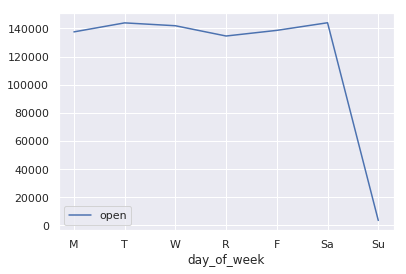

In [6]:
ax = df[['day_of_week', 'open']].groupby('day_of_week').sum().plot()
ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);

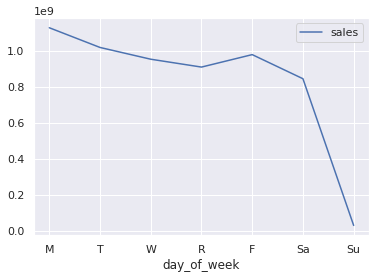

In [7]:
ax = df[['day_of_week', 'sales']].groupby('day_of_week').sum().plot()
ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);

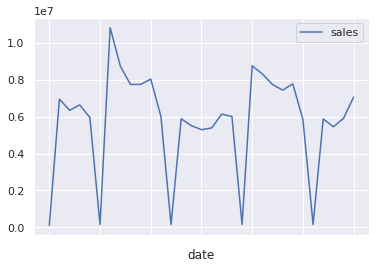

In [8]:
# df[['date', 'sales']].groupby('date').sum().plot()
ax = df.loc[(df.date >= '2013-01-01') & (df.date <= '2013-01-31'), ['date', 'sales']].groupby('date').sum().plot()
#ax.set_xticklabels(pd.date_range('2013-01-06', '2013-01-31'), rotation=60)
#ax.set(xticklabels=pd.date_range('2013-01-06', '2013-01-31'), rotation=60)
#df[['date', 'sales']].groupby('date').resample('BA').sum().plot()

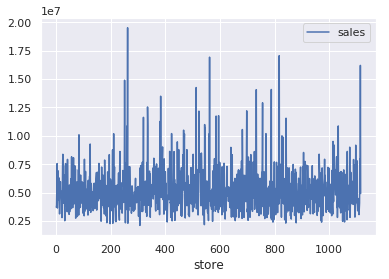

In [9]:
df[['store', 'sales']].groupby('store').sum().plot()

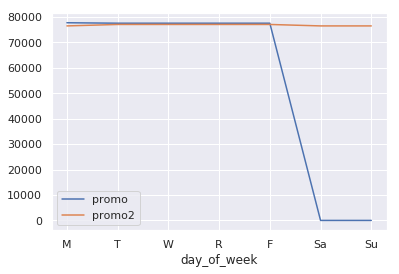

In [10]:
ax = df[['day_of_week', 'promo', 'promo2']].groupby('day_of_week').sum().plot()
ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);
#ax = df.loc[df.open == 1, ['day_of_week', 'promo', 'promo2']].groupby('day_of_week').sum().plot()
#ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);

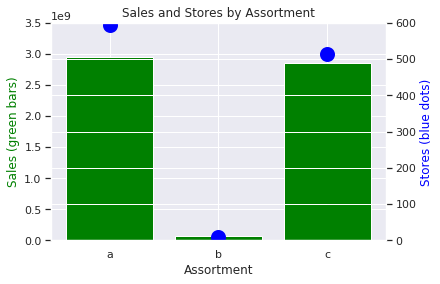

In [15]:
total_sales_by_assortment = df[['sales', 'assortment']].groupby('assortment').sum()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_assortment.index,
         #height=df[['sales', 'assortment']].groupby('assortment').sum().reshape(3,), color='green')
         height=np.array(total_sales_by_assortment['sales']).reshape(3,), color='green')
ax_l.set_ylim([0, 3.5e9])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'assortment']].groupby('assortment').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 600])

ax_l.set_title('Sales and Stores by Assortment')
ax_l.set_ylabel('Sales (green bars)', color='green')
#ax_l.yaxis.set_major_formatter(plt.FuncFormatter(lambda value,_:'${:,.0f}'.format(value)))
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Assortment');

# 9 stores have assortment 'b', while 593 have 'a' and 513 have 'c'
#len(df[df.assortment == 'b'])/942 # 9
#len(df[df.assortment == 'a'])/942 # 593
#len(df[df.assortment == 'c'])/942 # 513

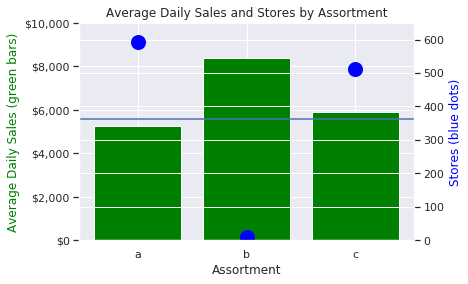

In [55]:
total_sales_by_assortment = df[['sales', 'assortment']].groupby('assortment').sum()
store_counts_by_assortment = (df[['store', 'assortment']].groupby('assortment').count().values/942).reshape(3,)
avg_daily_sales_by_assortment = \
    np.array(total_sales_by_assortment['sales']).reshape(3,) / (store_counts_by_assortment * 942)
avg_daily_sales_by_assortment

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_assortment.index,
         height=avg_daily_sales_by_assortment, color='green')
ax_l.set_ylim([0, 10000])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'assortment']].groupby('assortment').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_l.set_title('Average Daily Sales and Stores by Assortment')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.yaxis.set_major_formatter(plt.FuncFormatter(lambda value,_:'${:,.0f}'.format(value)))
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Assortment')
ax_l.axhline(df.sales.mean());

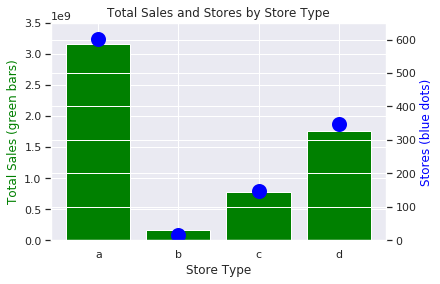

In [17]:
sales_by_store_type = df[['sales', 'store', 'store_type']].groupby('store_type').sum()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=sales_by_store_type.index, height=sales_by_store_type['sales'], color='green')
ax_l.set_ylim([0, 3.5e9])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'store_type']].groupby('store_type').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_r.set_title('Total Sales and Stores by Store Type')
ax_l.set_ylabel('Total Sales (green bars)', color='green')
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Store Type');

# 17 stores have store_type 'b' and 148 stores have store_type 'c', while 602 have 'a' and 348 have 'd'
# len(df[df.store_type == 'b'])/942 # 17
# len(df[df.store_type == 'a'])/942 # 602
# len(df[df.store_type == 'c'])/942 # 148
# len(df[df.store_type == 'd'])/942 # 348

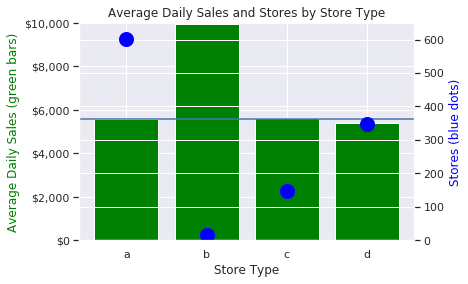

In [54]:
total_sales_by_store_type = df[['sales', 'store_type']].groupby('store_type').sum()
store_counts_by_store_type = (df[['store', 'store_type']].groupby('store_type').count().values/942).reshape(4,)
avg_daily_sales_by_store_type = \
    np.array(total_sales_by_store_type['sales']).reshape(4,) / (store_counts_by_store_type * 942)
avg_daily_sales_by_store_type

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_store_type.index,
         height=avg_daily_sales_by_store_type, color='green')
ax_l.set_ylim([0, 10000])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'store_type']].groupby('store_type').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_l.set_title('Average Daily Sales and Stores by Store Type')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.yaxis.set_major_formatter(plt.FuncFormatter(lambda value,_:'${:,.0f}'.format(value)))
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Store Type')
ax_l.axhline(df.sales.mean());

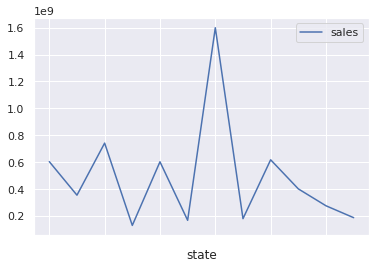

In [156]:
ax = df[['state','sales']].groupby('state').sum().plot()
ax.set_xlabel = df['state'].unique()

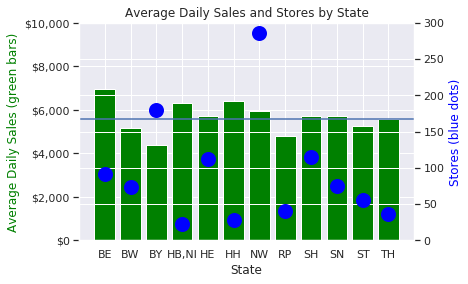

In [59]:
total_sales_by_state = df[['sales', 'state']].groupby('state').sum()
store_counts_by_state = (df[['store', 'state']].groupby('state').count().values/942).reshape(12,)
avg_daily_sales_by_state = \
    np.array(total_sales_by_state['sales']).reshape(12,) / (store_counts_by_state * 942)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_state.index,
         height=avg_daily_sales_by_state, color='green')
ax_l.set_ylim([0, 10000])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'state']].groupby('state').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 300])

ax_l.set_title('Average Daily Sales and Stores by State')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.yaxis.set_major_formatter(plt.FuncFormatter(lambda value,_:'${:,.0f}'.format(value)))
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('State')
ax_l.axhline(df.sales.mean());

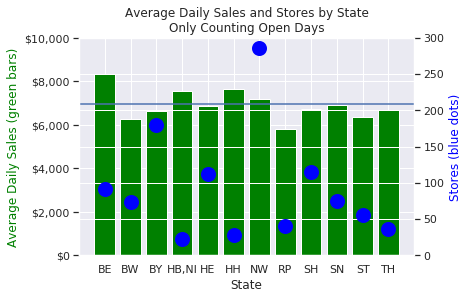

In [71]:
# Same chart as above but restricted only to open stores
open = df[df.open == 1]
total_sales_by_state = open[['sales', 'state']].groupby('state').sum()
store_counts_by_state = (open[['store', 'state']].groupby('state').count().values/942).reshape(12,)
avg_daily_sales_by_state = \
    np.array(total_sales_by_state['sales']).reshape(12,) / (store_counts_by_state * 942)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_state.index,
         height=avg_daily_sales_by_state, color='green')
ax_l.set_ylim([0, 10000])
# Note that here we're plotting by df (including days closed) rather than 'open' because each store may be open 
# less than 942 days - the variable being plotted is a basic store count, not store*days, so I just used df
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'state']].groupby('state').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 300])

ax_l.set_title('Average Daily Sales and Stores by State\nOnly Counting Open Days')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.yaxis.set_major_formatter(plt.FuncFormatter(lambda value,_:'${:,.0f}'.format(value)))
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('State')
ax_l.axhline(open.sales.mean());

In [69]:
open.store.nunique()
len(df) # 1050330
len(open) # 844340
len(df) - len(open) # 205990
open.date.nunique() # 942
df.date.nunique() # 942

942

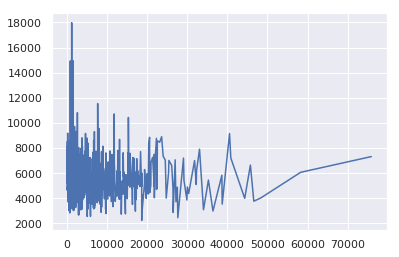

In [91]:
# No relationship between daily avg sales and nearest competition
total_sales_by_competition_distance = \
    np.array(df[['competition_distance', 'sales']].groupby('competition_distance').sum()[['sales']]).reshape(-1)
store_counts_by_competition_distance = \
    np.array(df[['competition_distance', 'store']].groupby('competition_distance').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_distance = \
    total_sales_by_competition_distance / (store_counts_by_competition_distance * 942)
xs = np.array((df[['competition_distance', 'sales']].groupby('competition_distance').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_distance);

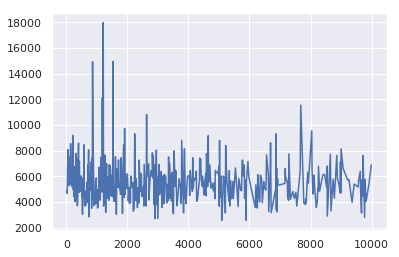

In [90]:
# No relationship between daily avg sales and nearest competition - even for <10km
u10 = df[df.competition_distance <= 10000]
total_sales_by_competition_distance = \
    np.array(u10[['competition_distance', 'sales']].groupby('competition_distance').sum()[['sales']]).reshape(-1)
store_counts_by_competition_distance = \
    np.array(u10[['competition_distance', 'store']].groupby('competition_distance').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_distance = \
    total_sales_by_competition_distance / (store_counts_by_competition_distance * 942)
xs = np.array((u10[['competition_distance', 'sales']].groupby('competition_distance').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_distance);

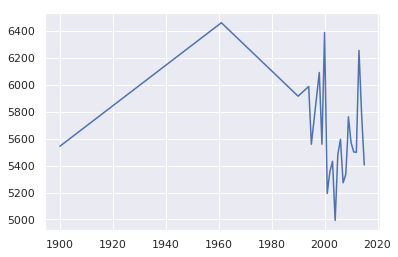

In [60]:
# Weird chart but looks like a rough correlation since 2000
total_sales_by_competition_open_since_year = \
    np.array(df[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_year = \
    np.array(df[['competition_open_since_year', 'store']].groupby('competition_open_since_year').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_year = \
    total_sales_by_competition_open_since_year / (store_counts_by_competition_open_since_year * 942)
xs = np.array((df[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_year);

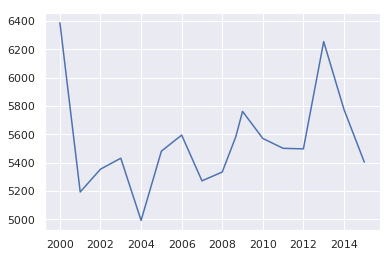

In [61]:
# Rough correlation since 2000 - check the store counts
s2000 = df[df.competition_open_since_year >= 2000]
total_sales_by_competition_open_since_year = \
    np.array(s2000[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_year = \
    np.array(s2000[['competition_open_since_year', 'store']].groupby('competition_open_since_year').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_year = \
    total_sales_by_competition_open_since_year / (store_counts_by_competition_open_since_year * 942)
xs = np.array((s2000[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_year);

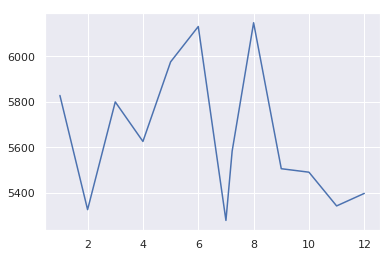

In [62]:
# Should be no correlation between which month the competition opened and avg sales
total_sales_by_competition_open_since_month = \
    np.array(df[['competition_open_since_month', 'sales']].groupby('competition_open_since_month').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_month = \
    np.array(df[['competition_open_since_month', 'store']].groupby('competition_open_since_month').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_month = \
    total_sales_by_competition_open_since_month / (store_counts_by_competition_open_since_month * 942)
xs = np.array((df[['competition_open_since_month', 'sales']].groupby('competition_open_since_month').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_month);

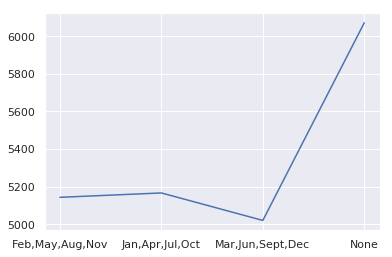

In [92]:
# At first glance, little difference between PromoInterval avg store sales
total_sales_by_promo_interval = \
    np.array(df[['promo_interval', 'sales']].groupby('promo_interval').sum()[['sales']]).reshape(-1)
store_counts_by_promo_interval = \
    np.array(df[['promo_interval', 'store']].groupby('promo_interval').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_promo_interval = \
    total_sales_by_promo_interval / (store_counts_by_promo_interval * 942)
xs = np.array((df[['promo_interval', 'sales']].groupby('promo_interval').sum()).index)
plt.plot(xs, avg_daily_sales_by_promo_interval);

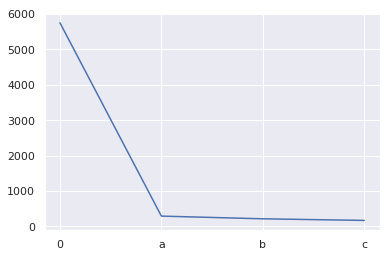

In [96]:
# Hardly anything gets sold on a state holiday - check that this is accurate if used
total_sales_by_state_holiday = \
    np.array(df[['state_holiday', 'sales']].groupby('state_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_state_holiday = \
    np.array(df[['state_holiday', 'store']].groupby('state_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_state_holiday = \
    total_sales_by_state_holiday / (store_counts_by_state_holiday)
xs = np.array((df[['state_holiday', 'sales']].groupby('state_holiday').sum()).index)
plt.plot(xs, avg_daily_sales_by_state_holiday);

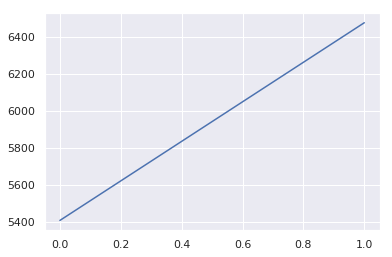

In [97]:
# School holidays are good for business - check that this is accurate if used
total_sales_by_school_holiday = \
    np.array(df[['school_holiday', 'sales']].groupby('school_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_school_holiday = \
    np.array(df[['school_holiday', 'store']].groupby('school_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_school_holiday = \
    total_sales_by_school_holiday / (store_counts_by_school_holiday)
xs = np.array((df[['school_holiday', 'sales']].groupby('school_holiday').sum()).index)
plt.plot(xs, avg_daily_sales_by_school_holiday);

0.9008549279208763

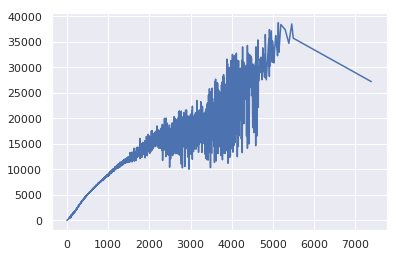

In [100]:
# Sales are highly correlated with # of customers
total_sales_by_customers = \
    np.array(df[['customers', 'sales']].groupby('customers').sum()[['sales']]).reshape(-1)
store_counts_by_customers = \
    np.array(df[['customers', 'store']].groupby('customers').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_customers = \
    total_sales_by_customers / (store_counts_by_customers * 942)
xs = np.array((df[['customers', 'sales']].groupby('customers').sum()).index)
plt.plot(xs, avg_daily_sales_by_customers);
df['sales'].corr(df['customers'])

-0.0021951449138758374

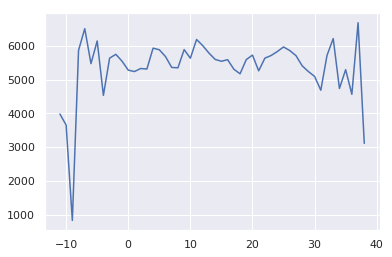

In [102]:
# Except at extreme temperatures, not much correlation between max_temperature_c and sales
total_sales_by_max_temperature_c = \
    np.array(df[['max_temperature_c', 'sales']].groupby('max_temperature_c').sum()[['sales']]).reshape(-1)
store_counts_by_max_temperature_c = \
    np.array(df[['max_temperature_c', 'store']].groupby('max_temperature_c').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_max_temperature_c = \
    total_sales_by_max_temperature_c / (store_counts_by_max_temperature_c * 942)
xs = np.array((df[['max_temperature_c', 'sales']].groupby('max_temperature_c').sum()).index)
plt.plot(xs, avg_daily_sales_by_max_temperature_c);

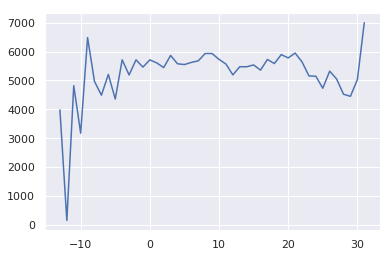

In [103]:
# Except at extreme temperatures, not much correlation between mean_temperature_c and sales
total_sales_by_mean_temperature_c = \
    np.array(df[['mean_temperature_c', 'sales']].groupby('mean_temperature_c').sum()[['sales']]).reshape(-1)
store_counts_by_mean_temperature_c = \
    np.array(df[['mean_temperature_c', 'store']].groupby('mean_temperature_c').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_mean_temperature_c = \
    total_sales_by_mean_temperature_c / (store_counts_by_mean_temperature_c * 942)
xs = np.array((df[['mean_temperature_c', 'sales']].groupby('mean_temperature_c').sum()).index)
plt.plot(xs, avg_daily_sales_by_mean_temperature_c);

In [43]:
df.groupby('events').count()['store'].sort_values()
df.sales.mean()

5591.74794873992

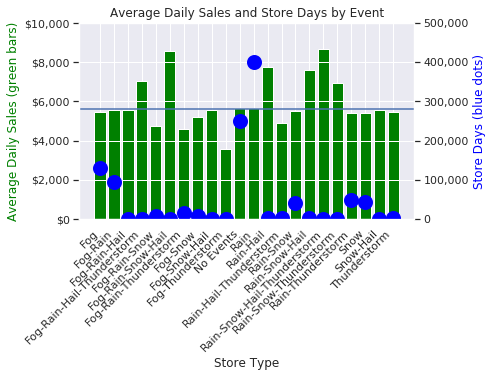

In [53]:
total_sales_by_events = \
    np.array(df[['events', 'sales']].groupby('events').sum()[['sales']]).reshape(-1)
store_counts_by_events = \
    np.array(df[['events', 'store']].groupby('events').count()[['store']]).reshape(-1)
avg_daily_sales_by_events = \
    total_sales_by_events / store_counts_by_events
xs = np.array((df[['events', 'sales']].groupby('events').sum()).index)
#fig, ax = plt.subplots()
#ax.plot(xs, avg_daily_sales_by_events)
#ax.plot(xs, store_counts_by_events)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=xs, height=avg_daily_sales_by_events, color='green')
ax_l.set_ylim([0, 10000])
ax_r.plot(xs, store_counts_by_events, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 500000])

ax_l.set_title('Average Daily Sales and Store Days by Event')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.yaxis.set_major_formatter(plt.FuncFormatter(lambda value,_:'${:,.0f}'.format(value)))
ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Store Days (blue dots)', color='blue')
ax_l.set_xlabel('Store Type')
fig.autofmt_xdate(rotation=45, ha='right')
ax_l.axhline(df.sales.mean());

In [ ]:
len(df[(df.promo == 1) & (df.open == 0)]) # 11203
len(df[(df.promo == 1) & (df.sales == 0)]) # 11205
(df[(df.promo == 1) & (df.sales == 0)]).head()
len(df[(df.promo2 == 1) & (df.open == 0)]) # 116835
(df[(df.promo2 == 1) & (df.open == 0)]).head()

In [ ]:
sns.PairGrid(df[:5], ['sales', 'store', 'date', 'promo', 'promo2'])

In [ ]:
pd.plotting.scatter_matrix(df[['sales', 'store', 'date', 'open', 'promo', 'promo2', 'competition_distance']])